## Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?


In [1]:
# Base libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS

%matplotlib inline

#warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
categorical = pd.read_csv("categorical_df.csv")

In [4]:
categorical.head()

,Unnamed: 0,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [8]:
categorical = categorical.drop("Unnamed: 0", axis=1)

In [9]:
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [10]:
categorical.shape

(9134, 14)

In [11]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             9134 non-null   object
 1   response          9134 non-null   object
 2   coverage          9134 non-null   object
 3   education         9134 non-null   object
 4   employmentstatus  9134 non-null   object
 5   gender            9134 non-null   object
 6   location_code     9134 non-null   object
 7   marital_status    9134 non-null   object
 8   policy_type       9134 non-null   object
 9   policy            9134 non-null   object
 10  renew_offer_type  9134 non-null   object
 11  sales_channel     9134 non-null   object
 12  vehicle_class     9134 non-null   object
 13  vehicle_size      9134 non-null   object
dtypes: object(14)
memory usage: 999.2+ KB


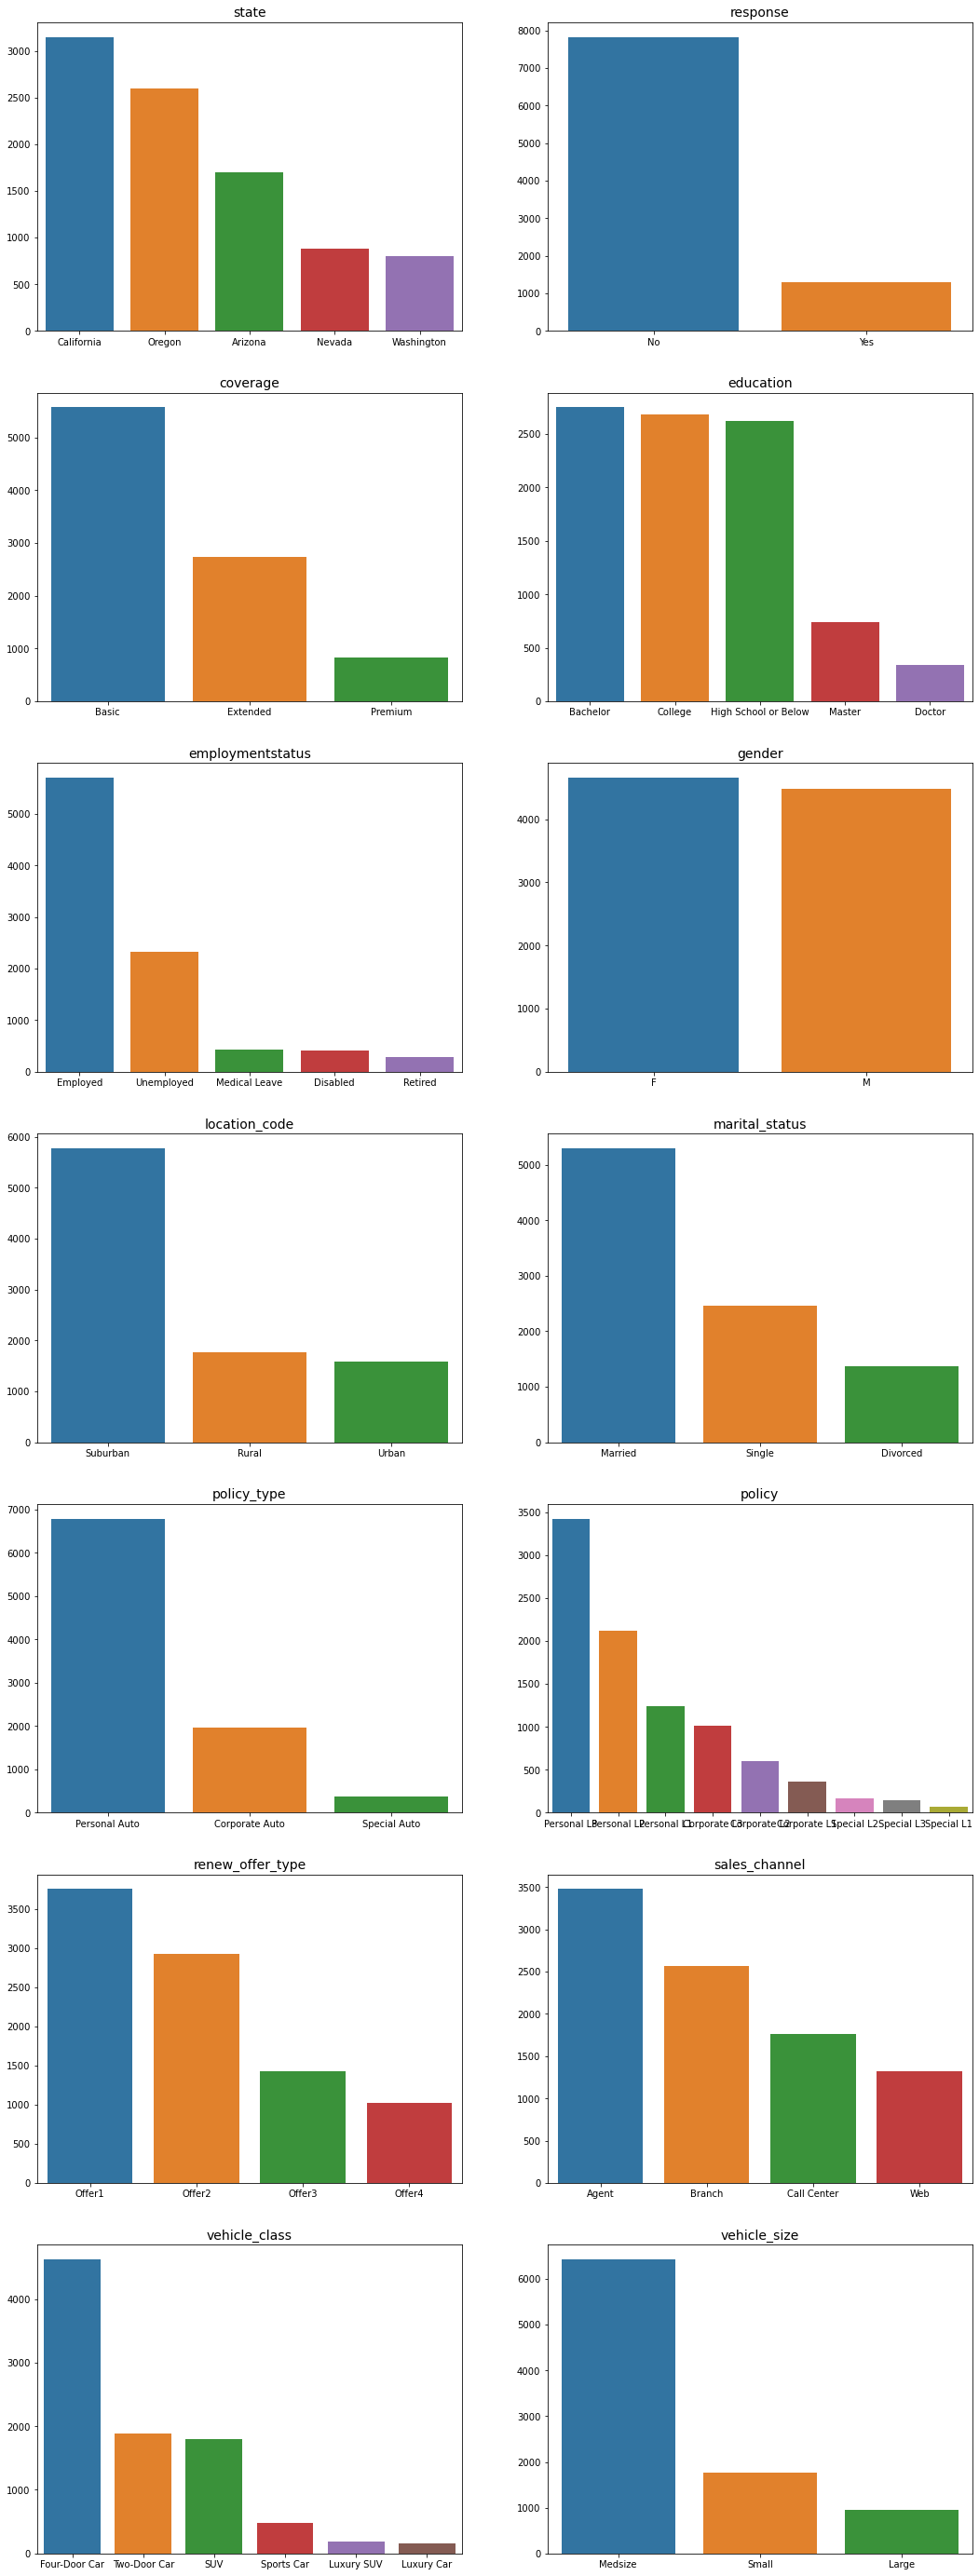

In [12]:
f, axes = plt.subplots(int(categorical.shape[1] / 2), 2, figsize=(18, 50))

for i, col in enumerate(categorical):

    sns.barplot(x = categorical[col].value_counts().index,
                y = categorical[col].value_counts(),
                ax=axes[int(i / 2)][int(i) % 2])  
    axes[int(i / 2)][int(i) % 2].set_title(col, fontsize = 14)
    axes[int(i / 2)][int(i) % 2].set_ylabel("")

plt.show()